## I. Para este ejercicio, primero debe obtener los datos de gapminder de la URL de carpintería de software y cargarlos como marco de datos de pandas. Los datos de gapminder tienen información sobre la vida útil, la población y el pib de los países durante varios años. Para eso use el siguiente código:

In [7]:
import pandas
import numpy as np

gapminder_csv_url ='http://bit.ly/2cLzoxH'
gapminder = pandas.read_csv(gapminder_csv_url)
gapminder.columns = ['Pais', 'Año', 'Poblacion', 'Continente', 'Expectativa_de_vida', 'PIB_per_capita']
print(gapminder)

             Pais   Año   Poblacion Continente  Expectativa_de_vida  \
0     Afghanistan  1952   8425333.0       Asia               28.801   
1     Afghanistan  1957   9240934.0       Asia               30.332   
2     Afghanistan  1962  10267083.0       Asia               31.997   
3     Afghanistan  1967  11537966.0       Asia               34.020   
4     Afghanistan  1972  13079460.0       Asia               36.088   
...           ...   ...         ...        ...                  ...   
1699     Zimbabwe  1987   9216418.0     Africa               62.351   
1700     Zimbabwe  1992  10704340.0     Africa               60.377   
1701     Zimbabwe  1997  11404948.0     Africa               46.809   
1702     Zimbabwe  2002  11926563.0     Africa               39.989   
1703     Zimbabwe  2007  12311143.0     Africa               43.487   

      PIB_per_capita  
0         779.445314  
1         820.853030  
2         853.100710  
3         836.197138  
4         739.981106  
...      

### 1. Realice un resumen estadístico de sus datos

In [8]:
# Realizar un resumen estadístico de los datos
resumen_estadistico = gapminder.describe()

# Imprimir el resumen
print(resumen_estadistico)

              Año     Poblacion  Expectativa_de_vida  PIB_per_capita
count  1704.00000  1.704000e+03          1704.000000     1704.000000
mean   1979.50000  2.960121e+07            59.474439     7215.327081
std      17.26533  1.061579e+08            12.917107     9857.454543
min    1952.00000  6.001100e+04            23.599000      241.165876
25%    1965.75000  2.793664e+06            48.198000     1202.060309
50%    1979.50000  7.023596e+06            60.712500     3531.846988
75%    1993.25000  1.958522e+07            70.845500     9325.462346
max    2007.00000  1.318683e+09            82.603000   113523.132900


### 2. Agrupe por la variable “año”. Comente respecto al resultado al usar groupby

In [9]:
# Agrupar por la variable "año"
grupos_por_año = gapminder.groupby('Año')

# Realizar operaciones agregadas en cada grupo, por ejemplo, contar el número de filas en cada grupo
conteo_por_año = grupos_por_año.size()

print(conteo_por_año)

Año
1952    142
1957    142
1962    142
1967    142
1972    142
1977    142
1982    142
1987    142
1992    142
1997    142
2002    142
2007    142
dtype: int64


- - El resultado será un conteo del número de filas en el DataFrame original que corresponden a cada año. Con groupby también se pueden realizar otras operaciones agregadas como sumas, medias, medianas, desviaciones estándar, entre otras.
- - El uso de groupby es útil para explorar datos basados en categorías específicas, como en este caso, donde estamos interesados en ver cómo se distribuyen los datos en función del año. Nos permite analizar tendencias o patrones a lo largo del tiempo u otras categorías relevantes.

#### Otra forma de obtener resultados

In [12]:
# Agrupar por la variable 'year'
grupo_año = gapminder.groupby('Año')

# Imprimir el resultado
for año, data in grupo_año:
    print(f"Año: {año}")
    print(data)

Año: 1952
                    Pais   Año   Poblacion Continente  Expectativa_de_vida  \
0            Afghanistan  1952   8425333.0       Asia               28.801   
12               Albania  1952   1282697.0     Europe               55.230   
24               Algeria  1952   9279525.0     Africa               43.077   
36                Angola  1952   4232095.0     Africa               30.015   
48             Argentina  1952  17876956.0   Americas               62.485   
...                  ...   ...         ...        ...                  ...   
1644             Vietnam  1952  26246839.0       Asia               40.412   
1656  West Bank and Gaza  1952   1030585.0       Asia               43.160   
1668          Yemen Rep.  1952   4963829.0       Asia               32.548   
1680              Zambia  1952   2672000.0     Africa               42.038   
1692            Zimbabwe  1952   3080907.0     Africa               48.451   

      PIB_per_capita  
0         779.445314  
12     

### 3. Ahora obtenga la suma (la cantidad), la media y la mediana para cada grupo, es decir, por año.

In [13]:
# Agrupar por la variable "Año"
grupos_por_año = gapminder.groupby('Año')

# Calcular la suma, la media y la mediana para cada grupo
resumen_por_año = grupos_por_año.agg({'Poblacion': 'sum', 'Expectativa_de_vida': ['mean', 'median'], 'PIB_per_capita': ['mean', 'median']})

# Imprimir el resultado
print(resumen_por_año)

         Poblacion Expectativa_de_vida          PIB_per_capita             
               sum                mean   median           mean       median
Año                                                                        
1952  2.406957e+09           49.057620  45.1355    3725.276046  1968.528344
1957  2.664405e+09           51.507401  48.3605    4299.408345  2173.220291
1962  2.899783e+09           53.609249  50.8810    4725.812342  2335.439533
1967  3.217478e+09           55.678290  53.8250    5483.653047  2678.334740
1972  3.576977e+09           57.647386  56.5300    6770.082815  3339.129407
1977  3.930046e+09           59.570157  59.6720    7313.166421  3798.609244
1982  4.289437e+09           61.533197  62.4415    7518.901673  4216.228428
1987  4.691477e+09           63.212613  65.8340    7900.920218  4280.300366
1992  5.110710e+09           64.160338  67.7030    8158.608521  4386.085502
1997  5.515204e+09           65.014676  69.3940    9090.175363  4781.825478
2002  5.8869

#### Otra forma

In [5]:
# Agrupar por la variable 'year' y calcular la suma, la mediana y la media
grupo_año = gapminder.groupby('Año').agg({'Poblacion': ['sum', 'median', 'mean'], 
                                            'Expectativa_de_vida': ['sum', 'median', 'mean'], 
                                            'PIB_per_capita': ['sum', 'median', 'mean']})

# Imprimir el resultado
print(grupo_año)

         Poblacion                           Expectativa_de_vida           \
               sum      median          mean                 sum   median   
Año                                                                         
1952  2.406957e+09   3943953.0  1.695040e+07          6966.18200  45.1355   
1957  2.664405e+09   4282942.0  1.876341e+07          7314.05096  48.3605   
1962  2.899783e+09   4686039.5  2.042101e+07          7612.51336  50.8810   
1967  3.217478e+09   5170175.5  2.265830e+07          7906.31712  53.8250   
1972  3.576977e+09   5877996.5  2.518998e+07          8185.92888  56.5300   
1977  3.930046e+09   6404036.5  2.767638e+07          8458.96236  59.6720   
1982  4.289437e+09   7007320.0  3.020730e+07          8737.71400  62.4415   
1987  4.691477e+09   7774861.5  3.303857e+07          8976.19100  65.8340   
1992  5.110710e+09   8688686.5  3.599092e+07          9110.76800  67.7030   
1997  5.515204e+09   9735063.5  3.883947e+07          9232.08400  69.3940   

### 4. ¿Sabías que en 1967 en Chile se inaugura el Aeropuerto Internacional Arturo Merino Benítez? Usando estos datos se puede especificar un año y obtener un marco de datos más pequeño para el año usando la función get_group(). Por ejemplo, podemos obtener el marco de datos agrupados para el año 1967. Comenta tus resultados. 

In [10]:
# Agrupar por la variable "Año"
grupos_por_año = gapminder.groupby('Año')

# Obtener el marco de datos para el año 1967
datos_1967 = grupos_por_año.get_group(1967)
print("Datos para el año 1967:")
print(datos_1967.head())

Datos para el año 1967:
           Pais   Año   Poblacion Continente  Expectativa_de_vida  \
3   Afghanistan  1967  11537966.0       Asia               34.020   
15      Albania  1967   1984060.0     Europe               66.220   
27      Algeria  1967  12760499.0     Africa               51.407   
39       Angola  1967   5247469.0     Africa               35.985   
51    Argentina  1967  22934225.0   Americas               65.634   

    PIB_per_capita  
3       836.197138  
15     2760.196931  
27     3246.991771  
39     5522.776375  
51     8052.953021  


#### Otra forma de calcular año 1967

In [31]:
# Obtener el marco de datos para el año 1967
datos_1967 = grupos_por_año.get_group(1967)

# Imprimir el resultado
print("Datos para el año 1967:")
print(datos_1967)

Datos para el año 1967:
                    Pais   Año   Poblacion Continente  Expectativa_de_vida  \
3            Afghanistan  1967  11537966.0       Asia               34.020   
15               Albania  1967   1984060.0     Europe               66.220   
27               Algeria  1967  12760499.0     Africa               51.407   
39                Angola  1967   5247469.0     Africa               35.985   
51             Argentina  1967  22934225.0   Americas               65.634   
...                  ...   ...         ...        ...                  ...   
1647             Vietnam  1967  39463910.0       Asia               47.838   
1659  West Bank and Gaza  1967   1142636.0       Asia               51.631   
1671          Yemen Rep.  1967   6740785.0       Asia               36.984   
1683              Zambia  1967   3900000.0     Africa               47.768   
1695            Zimbabwe  1967   4995432.0     Africa               53.995   

      PIB_per_capita  
3         836.19

 - - Población: Podríamos observar la población total de cada país en el año 1967, lo que nos daría una idea de cuáles eran los países más poblados en ese momento y cómo ha cambiado la distribución de la población.

In [11]:
# Ordenar los datos por población en orden descendente
datos_1967_sorted = datos_1967.sort_values(by='Poblacion', ascending=False)

# Seleccionar los primeros países más poblados
paises_mas_poblados_1967 = datos_1967_sorted.head(10)  # Elegir los primeros 10 países, por ejemplo

# Imprimir los países más poblados en el año 1967
print("Los países más poblados en 1967:")
print(paises_mas_poblados_1967[['Pais', 'Poblacion']])

Los países más poblados en 1967:
                Pais    Poblacion
291            China  754550000.0
699            India  506000000.0
1611   United States  198712000.0
711        Indonesia  109343000.0
795            Japan  100825279.0
171           Brazil   88049823.0
567          Germany   76368453.0
99        Bangladesh   62821884.0
1167        Pakistan   60641899.0
1599  United Kingdom   54959000.0


- - Expectativa de vida: La expectativa de vida promedio en 1967 nos daría una visión de la salud y el bienestar de la población mundial en ese momento. Podríamos ver cómo variaba la expectativa de vida entre diferentes países y regiones del mundo.

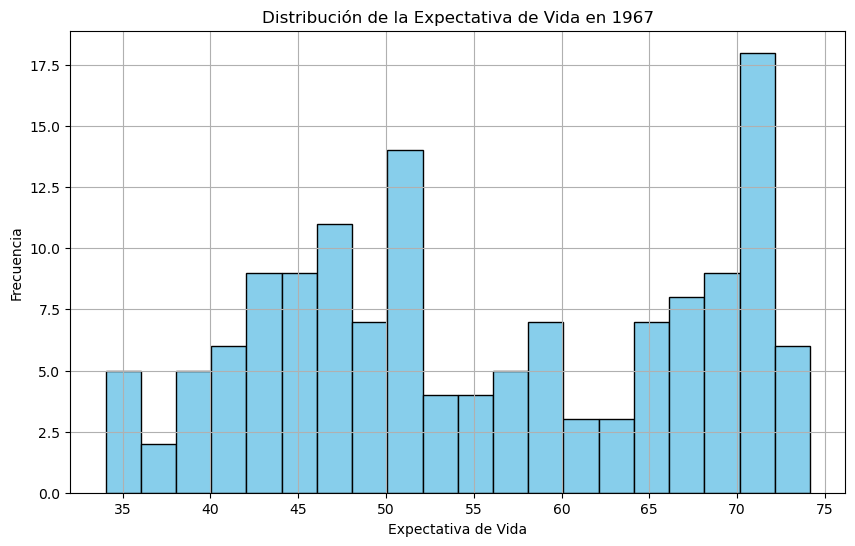

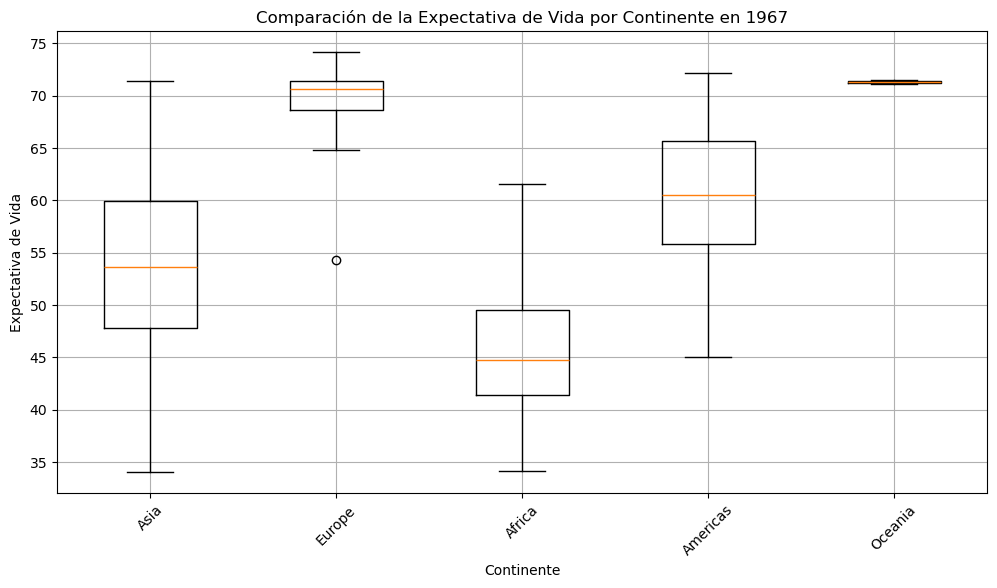

Estadísticas descriptivas de la expectativa de vida en 1967:
count    142.000000
mean      55.678290
std       11.718858
min       34.020000
25%       46.033750
50%       53.825000
75%       67.419500
max       74.160000
Name: Expectativa_de_vida, dtype: float64


In [18]:
# Calcular estadísticas descriptivas de la expectativa de vida por país
estadisticas_expectativa_vida = datos_1967['Expectativa_de_vida'].describe()

# Visualizar la distribución de la expectativa de vida con un histograma
plt.figure(figsize=(10, 6))
plt.hist(datos_1967['Expectativa_de_vida'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de la Expectativa de Vida en 1967')
plt.xlabel('Expectativa de Vida')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Comparar la expectativa de vida entre diferentes regiones del mundo con un boxplot
plt.figure(figsize=(12, 6))
plt.boxplot([datos_1967[datos_1967['Continente'] == continente]['Expectativa_de_vida'] for continente in datos_1967['Continente'].unique()], 
            labels=datos_1967['Continente'].unique())
plt.title('Comparación de la Expectativa de Vida por Continente en 1967')
plt.xlabel('Continente')
plt.ylabel('Expectativa de Vida')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Imprimir estadísticas descriptivas
print("Estadísticas descriptivas de la expectativa de vida en 1967:")
print(estadisticas_expectativa_vida)

- - PIB per cápita: El Producto Interno Bruto (PIB) per cápita en 2002 podría indicarnos el nivel de desarrollo económico de los países en ese año. Podríamos comparar los valores del PIB per cápita entre países para ver las disparidades económicas y las tendencias de crecimiento económico.

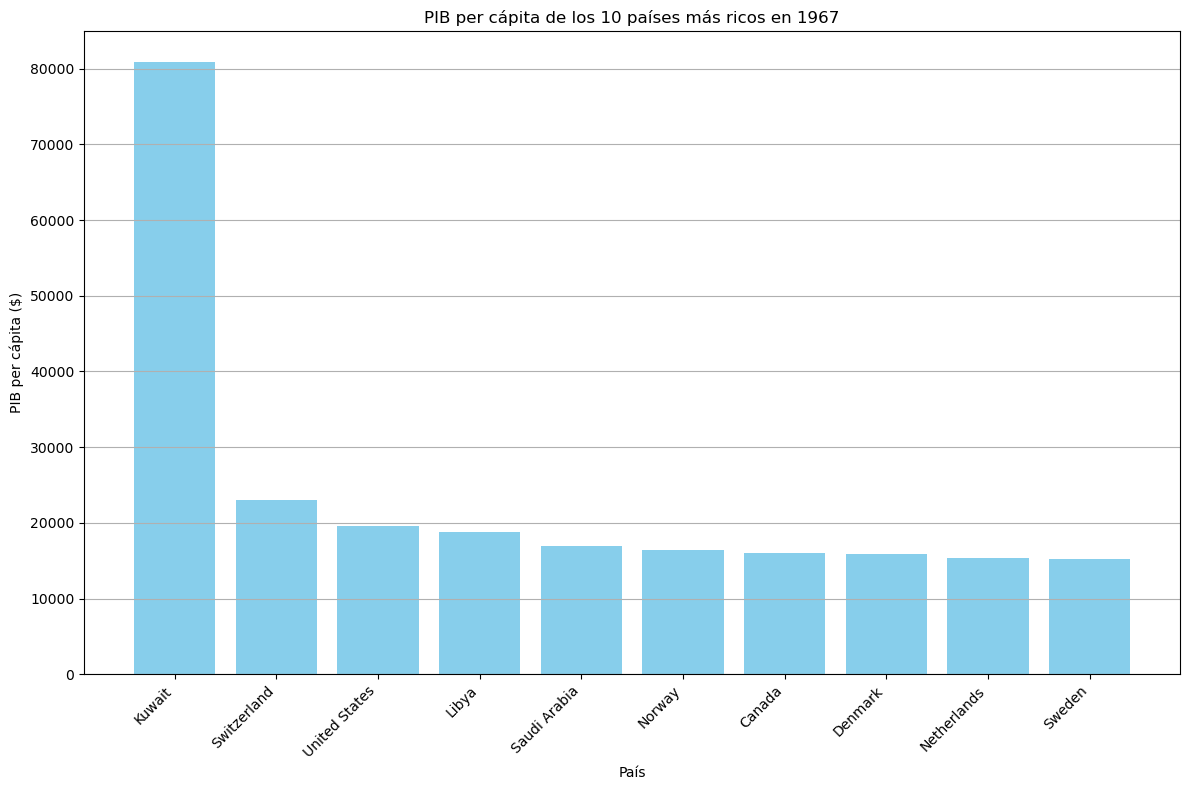

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Ordenar los datos por PIB per cápita en orden descendente
datos_1967_sorted = datos_1967.sort_values(by='PIB_per_capita', ascending=False)

# Seleccionar los primeros países más ricos
top_paises_ricos_1967 = datos_1967_sorted.head(10)

# Visualizar los valores del PIB per cápita para los países seleccionados
plt.figure(figsize=(12, 8))
plt.bar(top_paises_ricos_1967['Pais'], top_paises_ricos_1967['PIB_per_capita'], color='skyblue')
plt.title('PIB per cápita de los 10 países más ricos en 1967')
plt.xlabel('País')
plt.ylabel('PIB per cápita ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

- - Continente: Además de las variables mencionadas anteriormente, podríamos observar cómo se distribuyen estos indicadores en diferentes continentes. Esto nos daría una comprensión más amplia de las disparidades económicas y de salud a nivel global.

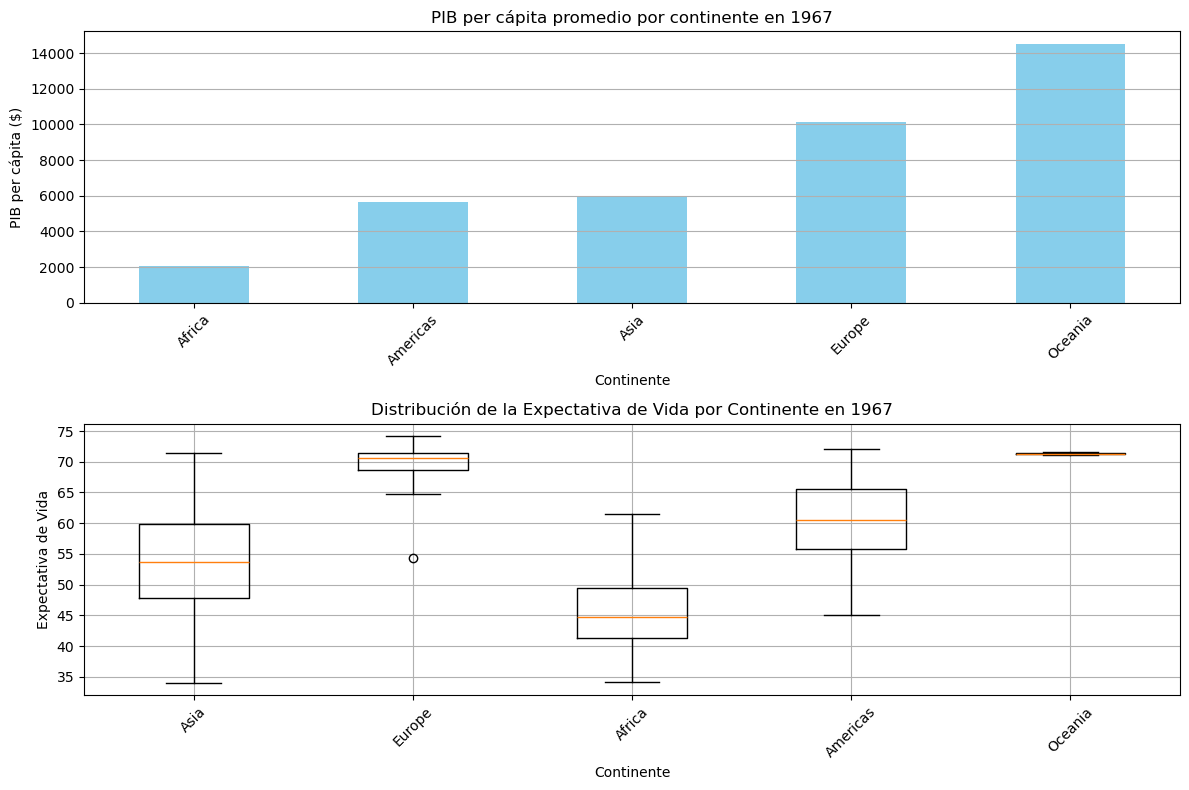

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Visualizar la distribución de los indicadores por continente
plt.figure(figsize=(12, 8))

# Gráfico de barras agrupado para el PIB per cápita por continente
plt.subplot(2, 1, 1)
datos_1967.groupby('Continente')['PIB_per_capita'].mean().plot(kind='bar', color='skyblue')
plt.title('PIB per cápita promedio por continente en 1967')
plt.xlabel('Continente')
plt.ylabel('PIB per cápita ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Boxplot para la expectativa de vida por continente
plt.subplot(2, 1, 2)
plt.boxplot([datos_1967[datos_1967['Continente'] == continente]['Expectativa_de_vida'] for continente in datos_1967['Continente'].unique()], 
            labels=datos_1967['Continente'].unique())
plt.title('Distribución de la Expectativa de Vida por Continente en 1967')
plt.xlabel('Continente')
plt.ylabel('Expectativa de Vida')
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Escoge otro año explicando el porqué de la elección y qué resultados obtuviste.

In [21]:
# Obtener el marco de datos para el año 2002
datos_2002 = grupos_por_año.get_group(2002)
print("Datos para el año 2002:")
print(datos_2002)

Datos para el año 2002:
                    Pais   Año   Poblacion Continente  Expectativa_de_vida  \
10           Afghanistan  2002  25268405.0       Asia               42.129   
22               Albania  2002   3508512.0     Europe               75.651   
34               Algeria  2002  31287142.0     Africa               70.994   
46                Angola  2002  10866106.0     Africa               41.003   
58             Argentina  2002  38331121.0   Americas               74.340   
...                  ...   ...         ...        ...                  ...   
1654             Vietnam  2002  80908147.0       Asia               73.017   
1666  West Bank and Gaza  2002   3389578.0       Asia               72.370   
1678          Yemen Rep.  2002  18701257.0       Asia               60.308   
1690              Zambia  2002  10595811.0     Africa               39.193   
1702            Zimbabwe  2002  11926563.0     Africa               39.989   

      PIB_per_capita  
10        726.73

- Seleccioné el año 2002 para explorar los datos, ya que el año 2002 marca un período de tiempo importante luego del cambio de milenio. Este año todavía estaba influenciado por eventos y tendencias que surgieron en los años anteriores, como la expansión de la globalización y los avances tecnológicos, pero también podría mostrar signos de adaptación a los desafíos o cambios que ocurrieron a principios de la década.

- - Población: Podríamos observar la población total de cada país en el año 2002.

In [22]:
# Ordenar los datos por población en orden descendente
datos_2002_sorted = datos_2002.sort_values(by='Poblacion', ascending=False)

# Seleccionar los primeros países más poblados
paises_mas_poblados_2002 = datos_2002_sorted.head(10)  # Elegir los primeros 10 países, por ejemplo

# Imprimir los países más poblados en el año 2002
print("Los países más poblados en 2002:")
print(paises_mas_poblados_2002[['Pais', 'Poblacion']])

Los países más poblados en 2002:
               Pais     Poblacion
298           China  1.280400e+09
706           India  1.034173e+09
1618  United States  2.876755e+08
718       Indonesia  2.110600e+08
178          Brazil  1.799142e+08
1174       Pakistan  1.534035e+08
106      Bangladesh  1.356568e+08
802           Japan  1.270658e+08
1138        Nigeria  1.199013e+08
994          Mexico  1.024799e+08


- - Expectativa de vida: 

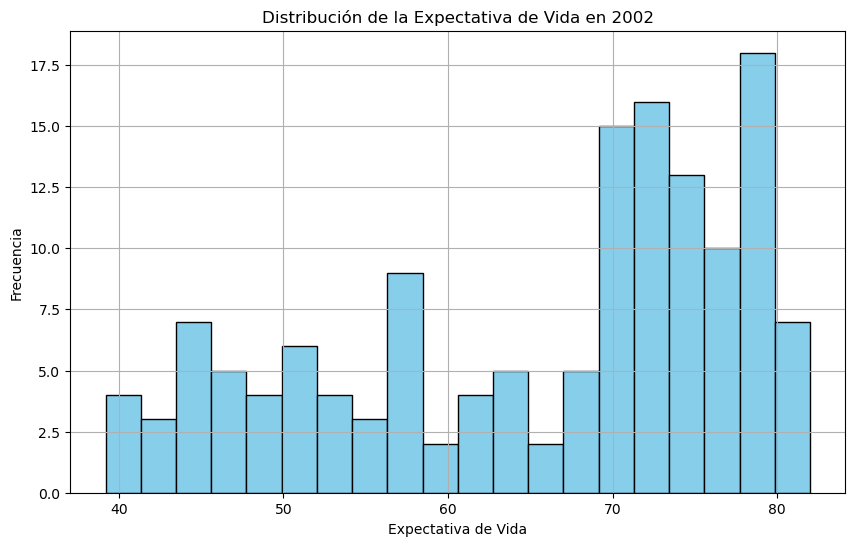

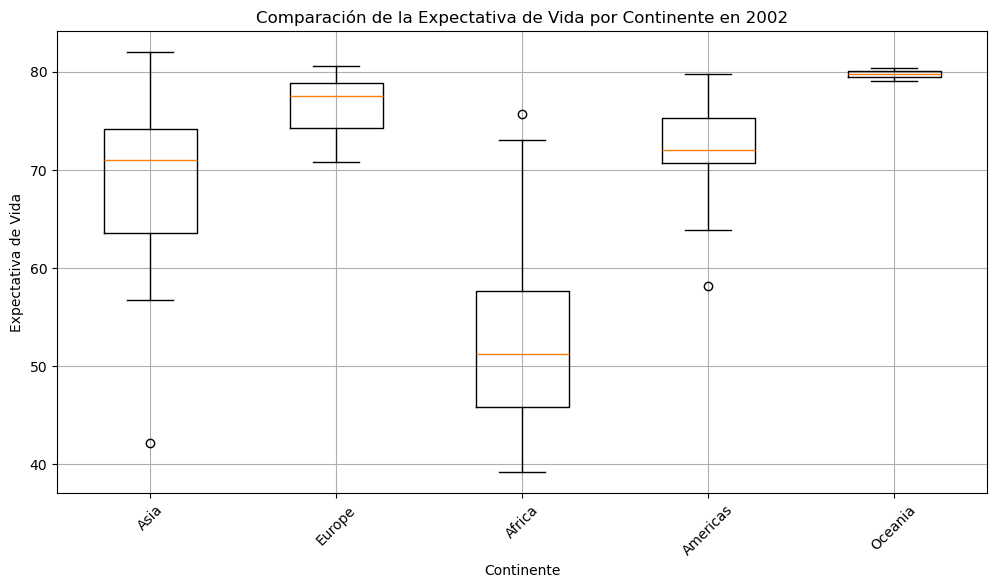

Estadísticas descriptivas de la expectativa de vida en 2002:
count    142.000000
mean      65.694923
std       12.279823
min       39.193000
25%       55.522250
50%       70.825500
75%       75.459250
max       82.000000
Name: Expectativa_de_vida, dtype: float64


In [23]:
# Calcular estadísticas descriptivas de la expectativa de vida por país
estadisticas_expectativa_vida = datos_2002['Expectativa_de_vida'].describe()

# Visualizar la distribución de la expectativa de vida con un histograma
plt.figure(figsize=(10, 6))
plt.hist(datos_2002['Expectativa_de_vida'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de la Expectativa de Vida en 2002')
plt.xlabel('Expectativa de Vida')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Comparar la expectativa de vida entre diferentes regiones del mundo con un boxplot
plt.figure(figsize=(12, 6))
plt.boxplot([datos_2002[datos_2002['Continente'] == continente]['Expectativa_de_vida'] for continente in datos_2002['Continente'].unique()], 
            labels=datos_2002['Continente'].unique())
plt.title('Comparación de la Expectativa de Vida por Continente en 2002')
plt.xlabel('Continente')
plt.ylabel('Expectativa de Vida')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Imprimir estadísticas descriptivas
print("Estadísticas descriptivas de la expectativa de vida en 2002:")
print(estadisticas_expectativa_vida)

- - PIB per cápita

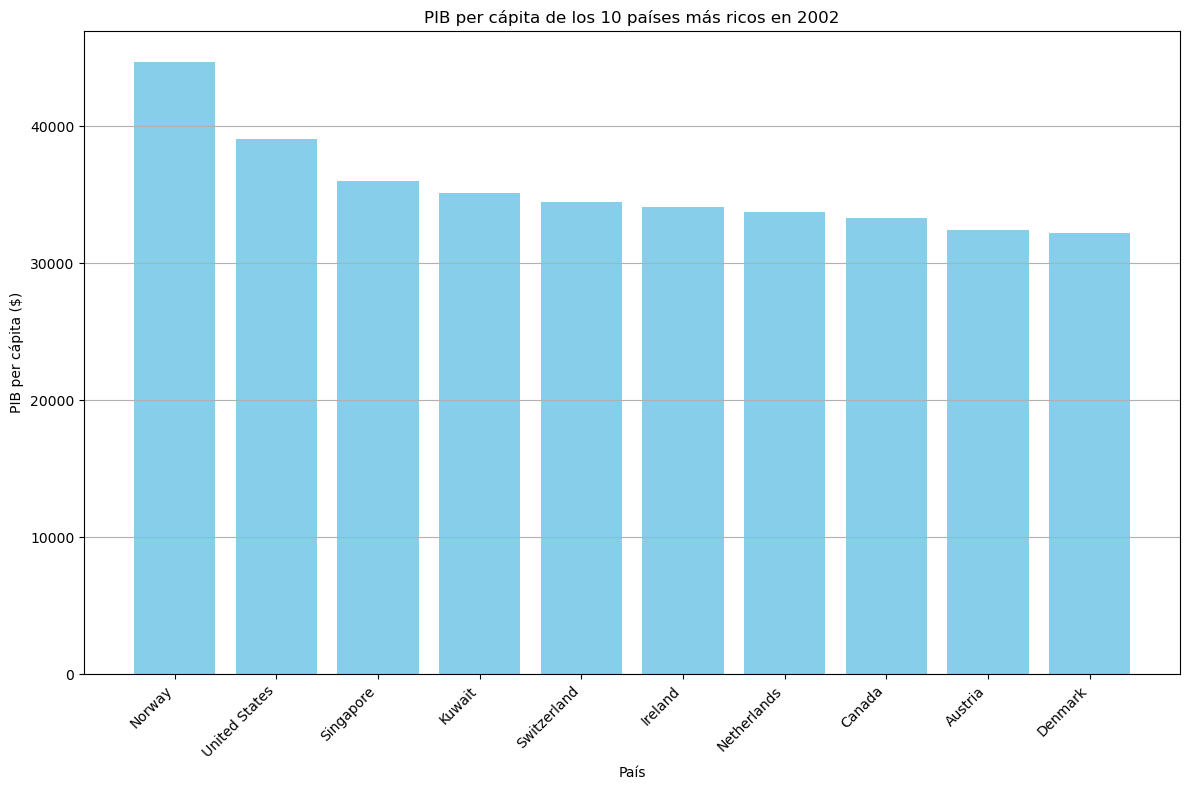

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Ordenar los datos por PIB per cápita en orden descendente
datos_2002_sorted = datos_2002.sort_values(by='PIB_per_capita', ascending=False)

# Seleccionar los primeros países más ricos
top_paises_ricos_2002 = datos_2002_sorted.head(10)

# Visualizar los valores del PIB per cápita para los países seleccionados
plt.figure(figsize=(12, 8))
plt.bar(top_paises_ricos_2002['Pais'], top_paises_ricos_2002['PIB_per_capita'], color='skyblue')
plt.title('PIB per cápita de los 10 países más ricos en 2002')
plt.xlabel('País')
plt.ylabel('PIB per cápita ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

- - Continente: Además de las variables mencionadas anteriormente, podríamos observar cómo se distribuyen estos indicadores en diferentes continentes. Esto nos daría una comprensión más amplia de las disparidades económicas y de salud a nivel global.

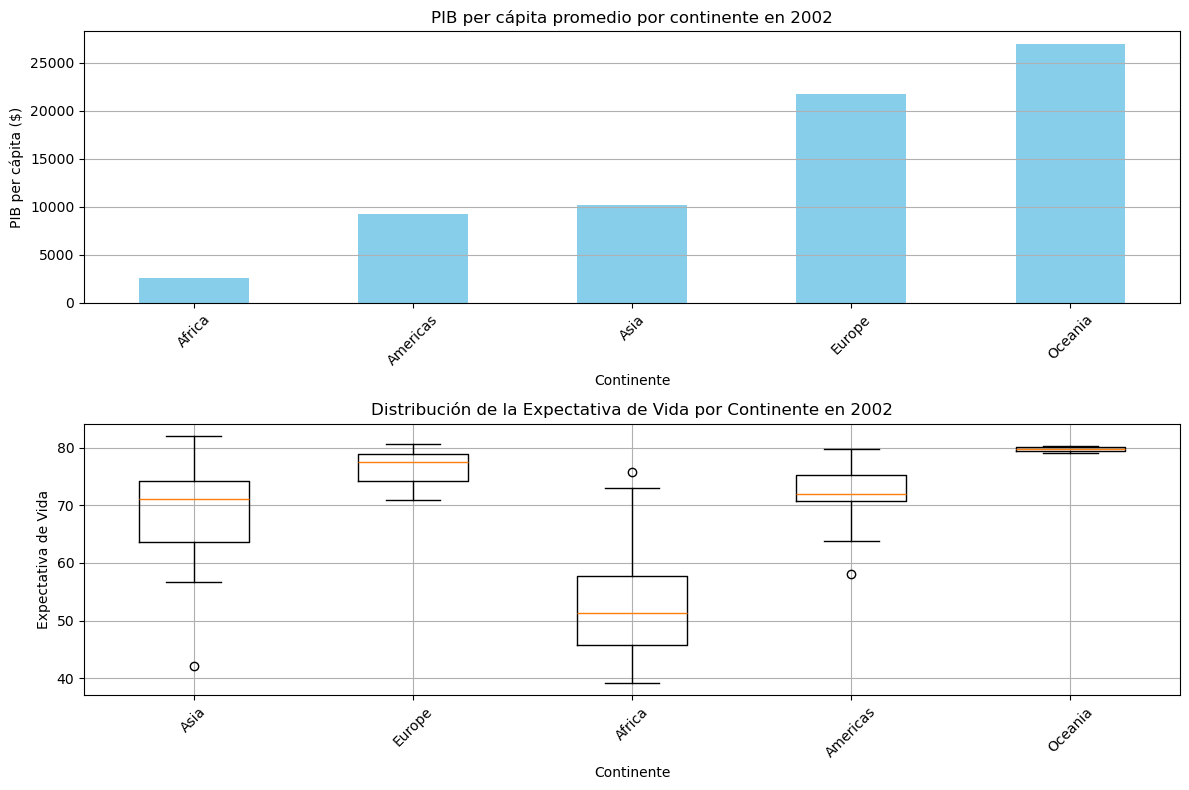

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Visualizar la distribución de los indicadores por continente
plt.figure(figsize=(12, 8))

# Gráfico de barras agrupado para el PIB per cápita por continente
plt.subplot(2, 1, 1)
datos_2002.groupby('Continente')['PIB_per_capita'].mean().plot(kind='bar', color='skyblue')
plt.title('PIB per cápita promedio por continente en 2002')
plt.xlabel('Continente')
plt.ylabel('PIB per cápita ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Boxplot para la expectativa de vida por continente
plt.subplot(2, 1, 2)
plt.boxplot([datos_2002[datos_2002['Continente'] == continente]['Expectativa_de_vida'] for continente in datos_2002['Continente'].unique()], 
            labels=datos_2002['Continente'].unique())
plt.title('Distribución de la Expectativa de Vida por Continente en 2002')
plt.xlabel('Continente')
plt.ylabel('Expectativa de Vida')
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## II. Ahora con los datos anteriores construya tablas pivote según las siguientes instrucciones:

### 1. Construya una tabla fijando “continent”, con las funciones vistas en clase

In [26]:
# Imprimir las columnas disponibles en el DataFrame
print(gapminder.columns)

Index(['Pais', 'Año', 'Poblacion', 'Continente', 'Expectativa_de_vida',
       'PIB_per_capita'],
      dtype='object')


In [30]:
# Aplicar diferentes funciones de resumen a cada grupo
tabla_resumen = gapminder.groupby(['Continente', 'Año']).agg({'PIB_per_capita': ['mean', 'median', 'max'],
                                                             'Expectativa_de_vida': ['mean', 'median', 'max']})

# Renombrar las columnas para mayor claridad
tabla_resumen.columns = ['PIB_per_capita', 'PIB_per_capita_median', 'PIB_per_capita_max',
                         'Expectativa_de_vida_mean', 'Expectativa_de_vida_median', 'Expectativa_de_vida_max']

# Mostrar la tabla
print(tabla_resumen)

                 PIB_per_capita  PIB_per_capita_median  PIB_per_capita_max  \
Continente Año                                                               
Africa     1952     1252.572466             987.025569         4725.295531   
           1957     1385.236062            1024.022987         5487.104219   
           1962     1598.078825            1133.783678         6757.030816   
           1967     2050.363801            1210.376379        18772.751690   
           1972     2339.615674            1443.372508        21011.497210   
           1977     2585.938508            1399.638836        21951.211760   
           1982     2481.592960            1323.728306        17364.275380   
           1987     2282.668991            1219.585563        11864.408440   
           1992     2281.810333            1161.631357        13522.157520   
           1997     2378.759555            1179.883114        14722.841880   
           2002     2599.385159            1215.683217        12

In [29]:
# Crear una tabla pivotante fijando 'continent' y calculando la media de 'lifeExp' y 'gdpPercap'
tabla = gapminder.pivot_table(index='Continente', values=['Expectativa_de_vida', 'PIB_per_capita'])

# Imprimir la tabla
print(tabla)

            Expectativa_de_vida  PIB_per_capita
Continente                                     
Africa                48.865330     2193.754578
Americas              64.658737     7136.110356
Asia                  60.064903     7902.150428
Europe                71.903686    14469.475533
Oceania               74.326208    18621.609223


## Realice una tabla de doble entrada, fijando “continent” y “year”. Comente sus resultados.

In [31]:
# Crear una tabla de doble entrada fijando "Continente" y "Año"
tabla_doble_entrada = pd.pivot_table(gapminder, index='Continente', columns='Año', 
                                     values=['PIB_per_capita', 'Expectativa_de_vida'], aggfunc='mean')

# Mostrar la tabla
print(tabla_doble_entrada)

           Expectativa_de_vida                                              \
Año                       1952       1957       1962       1967       1972   
Continente                                                                   
Africa               39.135500  41.266346  43.319442  45.334538  47.450942   
Americas             53.279840  55.960280  58.398760  60.410920  62.394920   
Asia                 46.314394  49.318544  51.563223  54.663640  57.319269   
Europe               64.408500  66.703067  68.539233  69.737600  70.775033   
Oceania              69.255000  70.295000  71.085000  71.310000  71.910000   

                                                                   ...  \
Año              1977       1982       1987       1992       1997  ...   
Continente                                                         ...   
Africa      49.580423  51.592865  53.344788  53.629577  53.598269  ...   
Americas    64.391560  66.228840  68.090720  69.568360  71.150480  ...   
Asia 

In [38]:
import matplotlib.pyplot as plt

# Crear una tabla pivotante fijando 'Continente' y 'Año'
tabla_pop = gapminder.pivot_table(index='Continente', columns='Año', values='Poblacion')

# Convertir los valores de la población a enteros
tabla_pop = tabla_pop.astype('int64')

# Imprimir la tabla
print(tabla_pop)

print('****************************************************************************************************')
print('Se puede apreciar un gran aumento de la población en el transcurso de los años.')

Año             1952      1957      1962      1967      1972      1977  \
Continente                                                               
Africa       4570009   5093033   5702247   6447874   7305375   8328096   
Americas    13806097  15478156  17330810  19229864  21175368  23122707   
Asia        42283556  47356987  51404763  57747360  65180977  72257986   
Europe      13937361  14596345  15345171  16039298  16687835  17238817   
Oceania      5343003   5970988   6641759   7300207   8053050   8619500   

Año             1982      1987      1992       1997       2002       2007  
Continente                                                                 
Africa       9602857  11054502  12674644   14304480   16033152   17875763  
Americas    25211636  27310158  29570964   31876016   33990910   35954847  
Asia        79095017  87006689  94948248  102523803  109145521  115513752  
Europe      17708896  18103138  18604759   18964804   19274128   19536617  
Oceania      9197425   97

## Con las variables anteriores, obtenga el promedio de la variable “pop”.

In [41]:
promedio_poblacion = gapminder['Poblacion'].mean()
print(f'El promedio de la población mundial entre los años 1952 - 2007es :{int(promedio_poblacion)}')

El promedio de la población mundial entre los años 1952 - 2007es :29601212


## 4. Obtenga un gráfico de barras del punto 3, comente sus resultados.

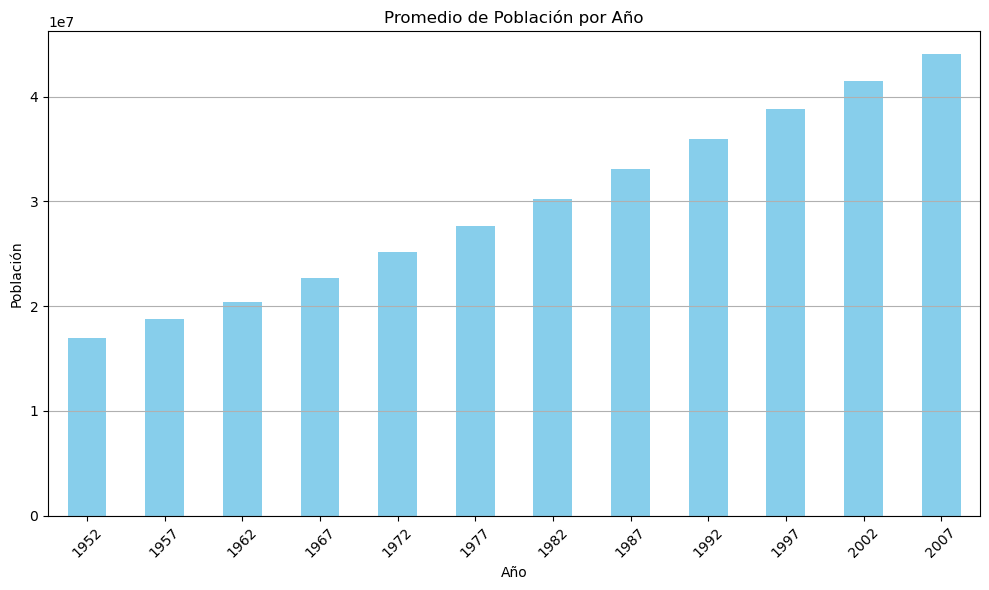

In [42]:
# Calcular el promedio de la población para cada año
promedio_poblacion_por_año = gapminder.groupby('Año')['Poblacion'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
promedio_poblacion_por_año.plot(kind='bar', color='skyblue')
plt.title('Promedio de Población por Año')
plt.xlabel('Año')
plt.ylabel('Población')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

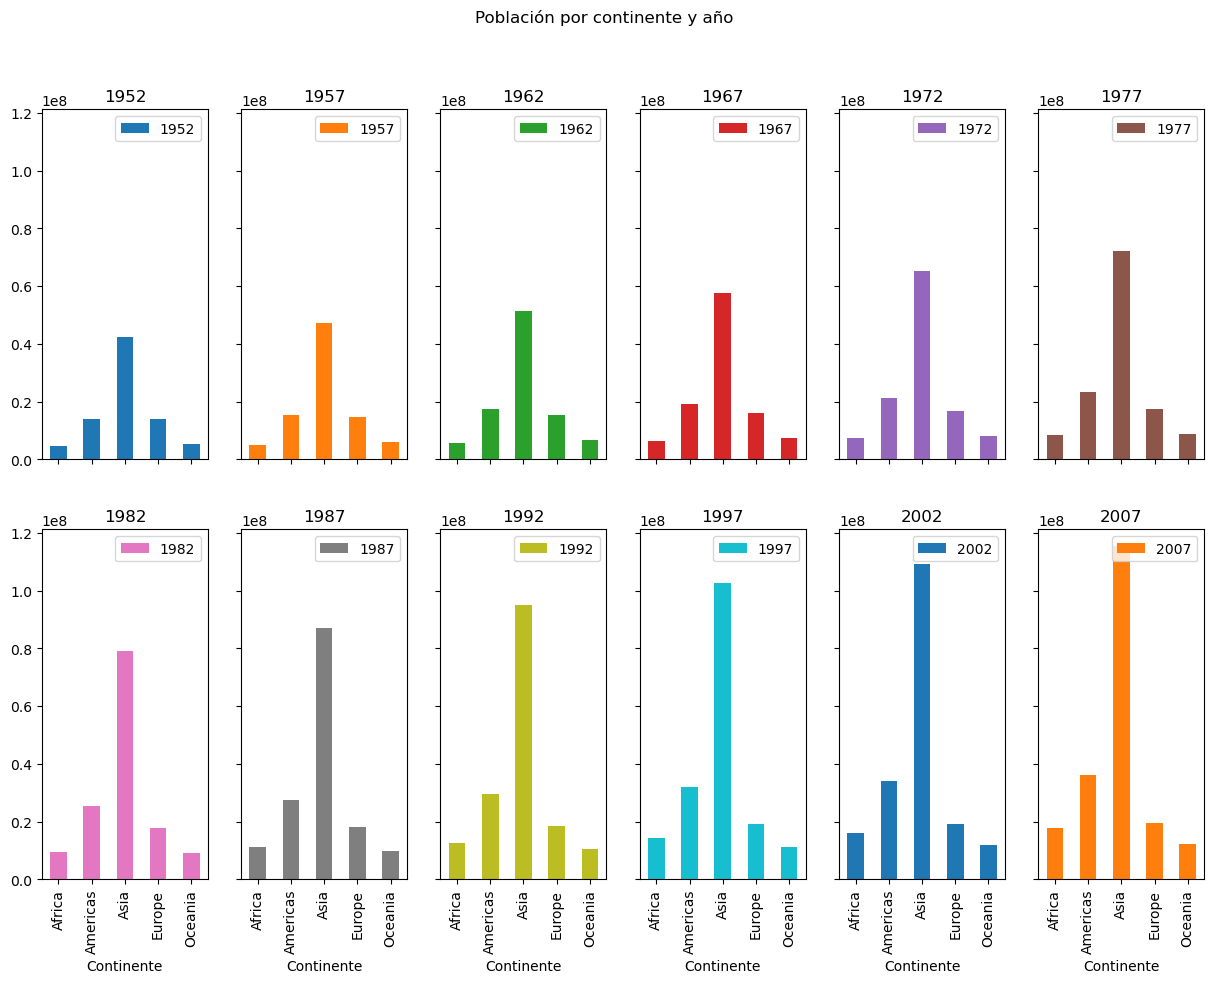

In [43]:
# crear graficos de barras de la tabla_pop

import matplotlib.pyplot as plt

#crear conjunto de 12 gráficos de barras de la tabla_pop crea titulo y etiquetas
tabla_pop.plot(kind='bar', subplots=True, layout=(2, 6), figsize=(15, 10), sharey=True)
plt.suptitle('Población por continente y año')
plt.show()